<a href="https://colab.research.google.com/github/otoperalias/Coyuntura/blob/main/clases/Tema2_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualización de datos: Creando gráficos de calidad

### Indicadores principales de coyuntura de los países de la Unión Europea

En este notebook vamos a descargar de [EUROSTAT](https://ec.europa.eu/eurostat/web/main/data/database) datos de PIB, paro e inflación para los países de la UE y a representarlos en gráficos de calidad.

*Daniel Oto-Peralías*

### Importar librerías

In [1]:
# IMPORTAMOS LIBRERIAS
import pandas as pd
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt

### Importamos y procesamos los datos

#### PIB en volúmen

In [ ]:
# PIB en volúmen (Gross domestic product, volumes (teina011))
link_pib="https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/teina011.tsv.gz"
pib = pd.read_csv(link_pib, compression='gzip', header=0, sep='\t')
pib # En el excel de EUROSTAT podemos comprobar que son tablas equivalentes.

Vamos a hacer el siguiente procesamiento a los datos:
1. Dividimos la columna ```na_item,unit,geo\time``` en tres columnas.
2. Seleccionamos solo la unidad "PCH_Q1_SCA" que significa "Percentage change, Quarterly variation rate, Seasonally and Calendar Adjusted.
3. Borramos los valores "p" y los ":".
4. Transponemos la tabla.
5. Usamos los nombres de países como nombre de las columnas.
6. Convertimos las columnas en formato numérico.
7. Establecemos el index de la tabla como fecha.


In [ ]:
# 1. Dividimos la columna en tres.
# Hay que separar por la coma=> Es fácil porque las posiciones de las comas son fijas en este caso.
pib['na_item']=pib['na_item,unit,geo\\time'].str[:4] # Nótese el uso de la doble barra (!)
pib['unit']=pib['na_item,unit,geo\\time'].str[5:15]
pib['geo']=pib['na_item,unit,geo\\time'].str[16:]
pib.drop(columns='na_item,unit,geo\\time',inplace=True)
pib

In [ ]:
# 2. Seleccionamos solo la variable PCH_Q1_SCA
pib=pib.loc[pib['unit']=="PCH_Q1_SCA"]
pib

In [ ]:
# 3. Borramos los valores p y los :
for col in pib.columns:
  pib[col]=pib[col].replace("p","",regex=True) # Dejamos espacio adelante porque dicho espacio existe en los datos.
  pib[col]=pib[col].replace(":","",regex=True)
  pib[col]=pib[col].replace(" ","",regex=True) # por si hay algún espacio
pib

In [ ]:
# 4. Transponemos la tabla
pib=pib.transpose()
pib

In [ ]:
# 5. Usamos la fila de nombres de países como nombres de las columnas
nombre_col = pib.iloc[-1] # Los nombres de países están en la última fila
pib = pib.iloc[:-3] # aplicamos un filtrado para quitar las tres últimas filas
pib.columns = nombre_col # Establecemos el nuevo nombre de las columnas
pib

In [ ]:
# 6. Convertimos las columnas en formato numérico.
for col in pib.columns:
  pib[col]=pd.to_numeric(pib[col], errors='coerce')
pib

In [ ]:
#7. Establecemos el index de la tabla como fecha
pib.index=pib.index.str.replace(" ","",regex=True)
pib.index=pd.to_datetime(pib.index)
pib

#### Tasa de desempleo

In [ ]:
# Tasa de desempleo (Total unemployment rate (tps00203))
link_des="https://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?file=data/une_rt_q.tsv.gz"
tp = pd.read_csv(link_des, compression='gzip', header=0, sep='\t')
tp

In [ ]:
# 1. Dividimos la columna en tres.
# Hay que separar por la coma=> Ojo, ahora es un poco más difícil
columna='s_adj,age,unit,sex,geo\\time'
tp['s_adj']=tp[columna].str.split(",").str[0]
tp['age']=tp[columna].str.split(",").str[1]
tp['unit']=tp[columna].str.split(",").str[2]
tp['sex']=tp[columna].str.split(",").str[3]
tp['geo']=tp[columna].str.split(",").str[4]
tp.drop(columns=columna,inplace=True)
tp

In [ ]:
# Exploramos un poco los datos
tp.unit.value_counts()


In [ ]:
# 2. Seleccionamos SA, Y15-74, PC_ACT, T
tp=tp.loc[(tp['s_adj']=="SA") &
          (tp['age']=="Y15-74") &
          (tp['unit']=="PC_ACT") &
          (tp['sex']=="T")]
tp



In [ ]:
# 3. Borramos los valores p y los :
for col in pib.columns:
  tp[col]=pib[col].replace("p","",regex=True) # Dejamos espacio adelante porque dicho espacio existe en los datos.
  pib[col]=pib[col].replace(":","",regex=True)
  pib[col]=pib[col].replace(" ","",regex=True) # por si hay algún espacio
pib

# 4. Transponemos la tabla
pib=pib.transpose()
pib

# 5. Usamos la fila de nombres de países como nombres de las columnas
nombre_col = pib.iloc[-1] # Los nombres de países están en la última fila
pib = pib.iloc[:-3] # aplicamos un filtrado para quitar las tres últimas filas
pib.columns = nombre_col # Establecemos el nuevo nombre de las columnas
pib

# 6. Convertimos las columnas en formato numérico.
for col in pib.columns:
  pib[col]=pd.to_numeric(pib[col], errors='coerce')
pib

#7. Establecemos el index de la tabla como fecha
pib.index=pib.index.str.replace(" ","",regex=True)
pib.index=pd.to_datetime(pib.index)
pib


Los códigos de países de EUROSTAT están disponibles aquí:  
https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Country_codes

### Procesar datos
##### Creamos una tabla con los datos de España e Italia de poblacion y PIB.


In [ ]:
# Seleccionamos países concretos
df=pwt.loc[(pwt['country']=="Spain")|(pwt['country']=="Italy"),['year','country','pop','rgdpo']].copy()
df

,year,country,pop,rgdpo
3780,1950,Spain,28.068985,1.082865e+05
3781,1951,Spain,28.304082,1.275794e+05
3782,1952,Spain,28.555996,1.338071e+05
3783,1953,Spain,28.810309,1.288749e+05
3784,1954,Spain,29.066649,1.456430e+05
...,...,...,...,...
5945,2015,Italy,60.578494,2.241117e+06
5946,2016,Italy,60.663060,2.351041e+06
5947,2017,Italy,60.673701,2.436383e+06
5948,2018,Italy,60.627291,2.458236e+06


In [ ]:
# Poner los datos en formato correcto a través del método .unstack()
df=df.set_index(['year','country']).unstack('country') # Observar que hemos creado un MultiIndex table
df.rename(columns={"Italy": "Italia","Spain":"España"},inplace=True) # Para que luego salga en castellano
df.index=pd.to_datetime(df.index,format='%Y') # Ponemos eje en formato fecha
df

pop                    rgdpo              
country        Italia     España        Italia        España
year                                                        
1950-01-01  46.980235  28.068985  2.131111e+05  1.082865e+05
1951-01-01  47.292406  28.304082  2.322223e+05  1.275794e+05
1952-01-01  47.539750  28.555996  2.396426e+05  1.338071e+05
1953-01-01  47.829979  28.810309  2.568350e+05  1.288749e+05
1954-01-01  48.171073  29.066649  2.679625e+05  1.456430e+05
1955-01-01  48.504188  29.325036  2.861924e+05  1.535488e+05
1956-01-01  48.791427  29.585488  2.971154e+05  1.647960e+05
1957-01-01  49.051733  29.848017  3.096596e+05  1.718760e+05
1958-01-01  49.344957  30.112648  3.233753e+05  1.791082e+05
1959-01-01  49.700013  30.379394  3.466561e+05  1.749703e+05
1960-01-01  50.064645  30.647762  3.796331e+05  1.951682e+05
1961-01-01  50.389383  30.910525  4.114001e+05  2.180950e+05
1962-01-01  50.708535  31.164746  4.345361e+05  2.393222e+05
1963-01-01  51.062693  31.436578  4.545169e+05  2.621955e+05
1964-01-01  51.463530  31.747673  4.673019e+05  2.757429e+05
1965-01-01  51.849403  32.091395  4.804741e+05  2.913619e+05
1966-01-01  52.192992  32.458940  5.074430e+05  3.134106e+05
1967-01-01  52.527602  32.857322  5.440732e+05  3.289751e+05
1968-01-01  52.846256  33.246432  5.794056e+05  3.518105e+05
1969-01-01  53.175783  33.573288  6.147533e+05  3.845443e+05
1970-01-01  53.518969  33.883749  6.976844e+05  4.002036e+05
1971-01-01  53.888874  34.267466  7.152452e+05  4.192892e+05
1972-01-01  54.258741  34.664234  7.512089e+05  4.536951e+05
1973-01-01  54.619237  35.069431  8.162928e+05  4.878308e+05
1974-01-01  54.957794  35.476423  8.737689e+05  5.114769e+05
1975-01-01  55.265284  35.879209  8.634326e+05  5.142255e+05
1976-01-01  55.537956  36.276752  9.502771e+05  5.380791e+05
1977-01-01  55.777880  36.666767  9.999018e+05  5.611714e+05
1978-01-01  55.988981  37.040396  1.059180e+06  5.778671e+05
1979-01-01  56.177851  37.386810  1.156425e+06  5.850789e+05
1980-01-01  56.349349  37.698196  1.236364e+06  6.067975e+05
1981-01-01  56.505478  37.971972  1.216659e+06  5.768439e+05
1982-01-01  56.644863  38.209693  1.197944e+06  5.581088e+05
1983-01-01  56.765251  38.413317  1.184148e+06  5.465781e+05
1984-01-01  56.863137  38.586708  1.199590e+06  5.375381e+05
1985-01-01  56.936774  38.733876  1.210967e+06  5.303874e+05
1986-01-01  56.983931  38.855626  1.292944e+06  5.645091e+05
1987-01-01  57.007741  38.954497  1.358465e+06  6.053188e+05
1988-01-01  57.018183  39.038692  1.418727e+06  6.482821e+05
1989-01-01  57.028703  39.118561  1.477759e+06  6.906510e+05
1990-01-01  57.048236  39.202525  1.541242e+06  7.283961e+05
1991-01-01  57.088113  39.299081  1.588200e+06  7.621688e+05
1992-01-01  57.145306  39.410857  1.617795e+06  7.810618e+05
1993-01-01  57.197613  39.533725  1.614803e+06  7.913827e+05
1994-01-01  57.213544  39.660069  1.667777e+06  8.250727e+05
1995-01-01  57.174408  39.787419  1.748618e+06  8.682256e+05
1996-01-01  57.065225  39.908959  1.782923e+06  8.995201e+05
1997-01-01  56.903640  40.035293  1.856405e+06  9.698566e+05
1998-01-01  56.742760  40.201560  1.942746e+06  1.035464e+06
1999-01-01  56.655632  40.454470  1.997615e+06  1.080920e+06
2000-01-01  56.692178  40.824754  2.046562e+06  1.151573e+06
2001-01-01  56.875147  41.319427  2.047270e+06  1.185869e+06
2002-01-01  57.182519  41.919585  2.019463e+06  1.226800e+06
2003-01-01  57.564588  42.596453  2.028394e+06  1.244541e+06
2004-01-01  57.948424  43.308345  2.040373e+06  1.289802e+06
2005-01-01  58.281212  44.019123  2.123677e+06  1.427946e+06
2006-01-01  58.542619  44.728565  2.202943e+06  1.557341e+06
2007-01-01  58.747861  45.429076  2.307501e+06  1.660386e+06
2008-01-01  58.922109  46.068811  2.359305e+06  1.687737e+06
2009-01-01  59.105625  46.583565  2.266004e+06  1.628010e+06
2010-01-01  59.325229  46.931015  2.293011e+06  1.622292e+06
2011-01-01  59.589076  47.084240  2.351126e+06  1.614884e+06
2012-01-01  59.879471  47.063060  2.301511e+06  1.603

In [ ]:
# Creamos tasa de variacion
tv=df.diff()/df.shift()*100

In [ ]:
# Medias de las tasas de crecimiento totales
tv_mean=tv.mean()

In [ ]:
# Medias para cada periodo de 20 años
tv20=tv.resample('20A').mean()
tv20.index=tv20.index.strftime('%Y') # Da formato adecuado al index, que contienen los años
tv20

pop               rgdpo          
country    Italia    España    Italia    España
year                                           
1950          NaN       NaN       NaN       NaN
1970     0.653695  0.945863  6.139546  6.861698
1990     0.320079  0.732372  4.103417  3.113768
2010     0.196315  0.905274  2.030741  4.134873
2030     0.227593 -0.045876  0.839717  1.721166

### Gráficos exploratorios: dibujamos directamente desde **pandas**

* Importante: esto solo vale como gráficos exploratorios para uso personal.
* Para otros propósitos, hay que preparar gráficos de más calidad.

In [ ]:
# Evolución de la población y el GDP en niveles
df['pop'].plot(title="Evol. de la población")
df['rgdpo'].plot(title="Evol. PIB real")

In [ ]:
# Ahora las tasas de variacion
tv['pop'].plot(title="TV de la población")
tv['pop']["1980":].plot(title="TV de la población") # Esto para un periodo determinado
tv['rgdpo'].plot(title="TV PIB real")

In [ ]:
# Grafico de barras para media de cada periodo de 20 años
tv20.plot.bar(title="media de cada periodo de 20 años")

### Gráficos de calidad (para informes, trabajos, artículos, etc.)

Matplotlib permite usar diferentes estilos predeterminados:
https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html

Echamos un vistazo y elegimos uno que nos guste.


In [ ]:
plt.style.use('seaborn')

#### Figura 1: Evolución anual de la población en España

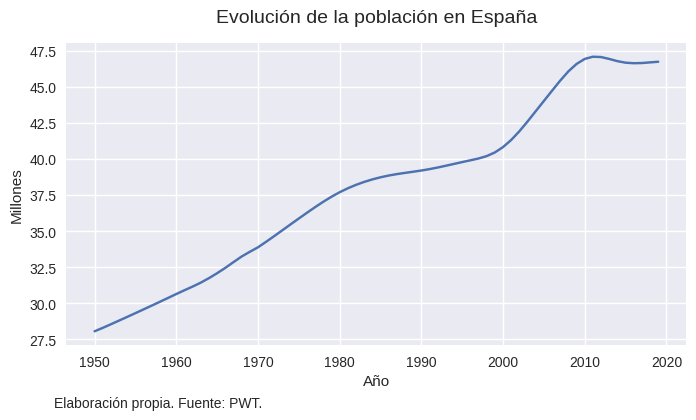

In [ ]:
fig, ax=plt.subplots(figsize=(8,4),dpi=100)
ax.plot(df['pop']['España']) # Equivalente: df['pop']['España'].plot(ax=ax)
ax.set_ylabel("Millones")
ax.set_xlabel("Año")
ax.set_title("Evolución de la población en España", size=14, pad=15)
fig.text(0.11,-0.03,"Elaboración propia. Fuente: PWT.", ha="left",fontsize=10 ) # ha=horizontalalignment
plt.show()

#### Figura 2: Tasa de crecimiento del PIB cada 20 años- España e Italia

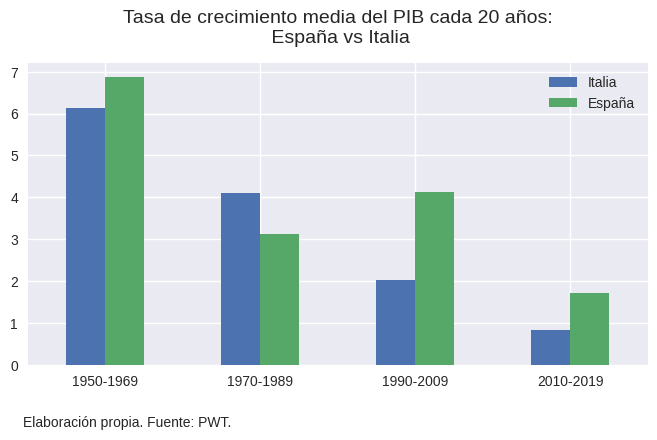

In [ ]:
fig,ax=plt.subplots(figsize=(8,4),dpi=100)
tv20['rgdpo'][1:].plot.bar(xlabel="", ax=ax)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(["1950-1969", "1970-1989","1990-2009","2010-2019"], rotation='horizontal')
ax.set_title("Tasa de crecimiento media del PIB cada 20 años:\n España vs Italia", size=14, pad=15)
ax.legend(title="")
fig.text(0.25,-0.03,"Elaboración propia. Fuente: PWT.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

#### Figura 3: Evolución de la población y su tasa de crecimiento

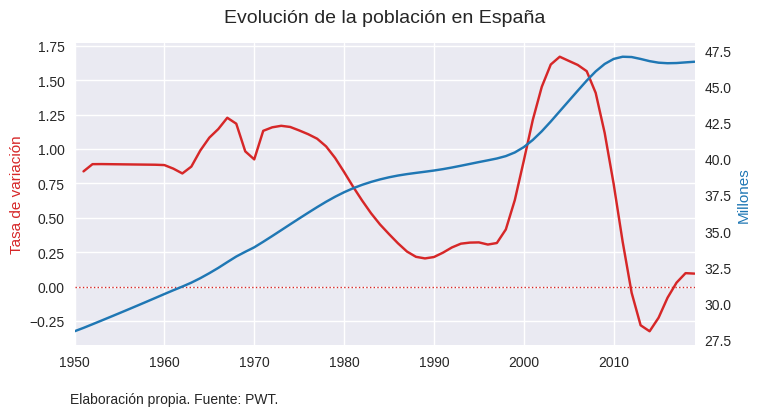

In [ ]:
fig, ax1=plt.subplots(figsize=(8,4),dpi=100)
    # Serie en eje y principal
tv['pop']['España'].plot(color='tab:red', ax=ax1)
    # Serie en eje y secundario (derecha)
ax2 = ax1.twinx()  # aquí se establece un segundo eje Y que comparte el mismo eje X
df['pop']['España'].plot(color='tab:blue', ax=ax2)
ax2.grid(False)
    # Ax1, Ax2: más detalles y línea de 0
ax1.set_ylabel("Tasa de variación",color='tab:red')
ax1.set_xlabel("")
ax2.set_ylabel("Millones", color='tab:blue')
ax1.axhline(y=0, linewidth=1, linestyle=":", color="tab:red")
    # Título etc
plt.title("Evolución de la población en España", size=14, pad=15)
fig.text(0.25,-0.02,"Elaboración propia. Fuente: PWT.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

#### Figura 4: Tasa de crecimiento del PIB España e Italia (2 gráficos)


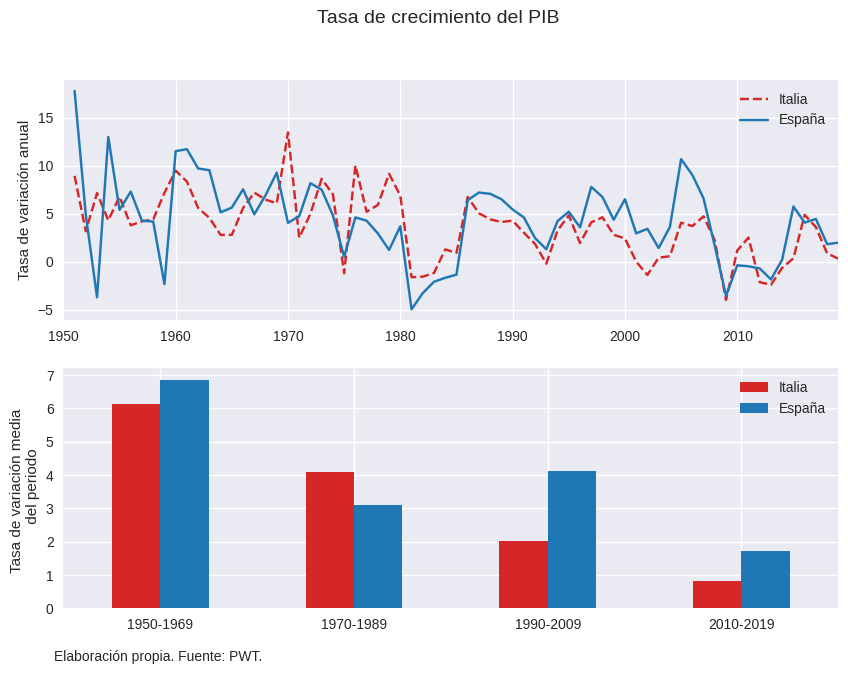

In [ ]:
fig, (ax1,ax2)=plt.subplots(2,1,figsize=(10,7),dpi=100)
# Axes1
tv['rgdpo']['Italia'].plot(label="Italia",style="--",c="tab:red", ax=ax1)
tv['rgdpo']['España'].plot(label="España",style="-", c="tab:blue", ax=ax1)
ax1.set_xlabel("")
ax1.set_ylabel("Tasa de variación anual")
ax1.legend()
# Axes2
tv20['rgdpo'][1:].plot.bar(ax=ax2, color=['tab:red','tab:blue'])
ax2.set_xticks([0,1,2,3])
ax2.set_xticklabels(["1950-1969", "1970-1989","1990-2009","2010-2019"], rotation='horizontal')
ax2.set_xlabel("")
ax2.set_ylabel("Tasa de variación media \n del periodo")
ax2.legend(title="")
# Aplicable al conjunto de la figura
fig.suptitle("Tasa de crecimiento del PIB", size=14)
fig.text(0.22,0.05,"Elaboración propia. Fuente: PWT.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.subplots_adjust(hspace=0.2)
plt.show()

#### Figura 5: Tasa de crecimiento del PIB y la población España e Italia (4 gráficos)

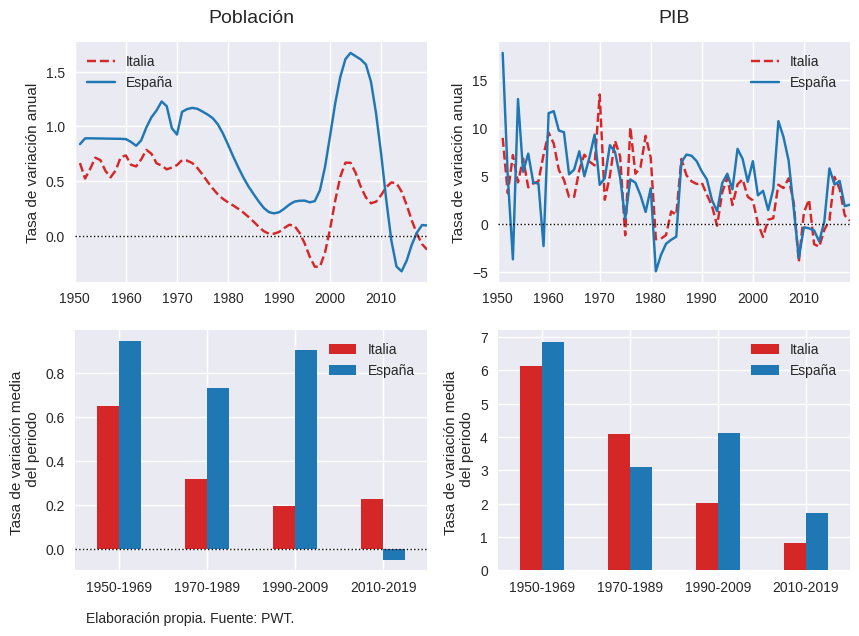

In [ ]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(10,7),dpi=100)
# Axes1
tv['pop']['Italia'].plot(label="Italia",style="--",c="tab:red", ax=ax1)
tv['pop']['España'].plot(label="España",style="-", c="tab:blue", ax=ax1)
ax1.axhline(y=0, linewidth=1, linestyle=":", color="black")
ax1.set_xlabel("")
ax1.set_ylabel("Tasa de variación anual")
ax1.set_title("Población", size=14, pad=14)
ax1.legend(frameon=False)
# Axes2
tv['rgdpo']['Italia'].plot(label="Italia",style="--",c="tab:red", ax=ax2)
tv['rgdpo']['España'].plot(label="España",style="-", c="tab:blue", ax=ax2)
ax2.axhline(y=0, linewidth=1, linestyle=":", color="black")
ax2.set_xlabel("")
ax2.set_ylabel("Tasa de variación anual")
ax2.set_title("PIB", size=14, pad=14)
ax2.legend(frameon=False)
# Axes3
tv20['pop'][1:].plot.bar(ax=ax3, color=['tab:red','tab:blue'])
ax3.axhline(y=0, linewidth=1, linestyle=":", color="black")
ax3.set_xticks([0,1,2,3])
ax3.set_xticklabels(["1950-1969", "1970-1989","1990-2009","2010-2019"], rotation='horizontal')
ax3.set_xlabel("")
ax3.set_ylabel("Tasa de variación media \n del periodo")
ax3.legend(title="", frameon=False)
# Axes4
tv20['rgdpo'][1:].plot.bar(ax=ax4, color=['tab:red','tab:blue'])
ax4.set_xticks([0,1,2,3])
ax4.set_xticklabels(["1950-1969", "1970-1989","1990-2009","2010-2019"], rotation='horizontal')
ax4.set_xlabel("")
ax4.set_ylabel("Tasa de variación media \n del periodo")
ax4.legend(title="", frameon=False)
# Aplicable al conjunto de la figura
fig.text(0.24,0.05,"Elaboración propia. Fuente: PWT.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.subplots_adjust(hspace=0.2)
plt.show()

#### Figura 6: Tasa de crecimiento del PIB en España e Italia

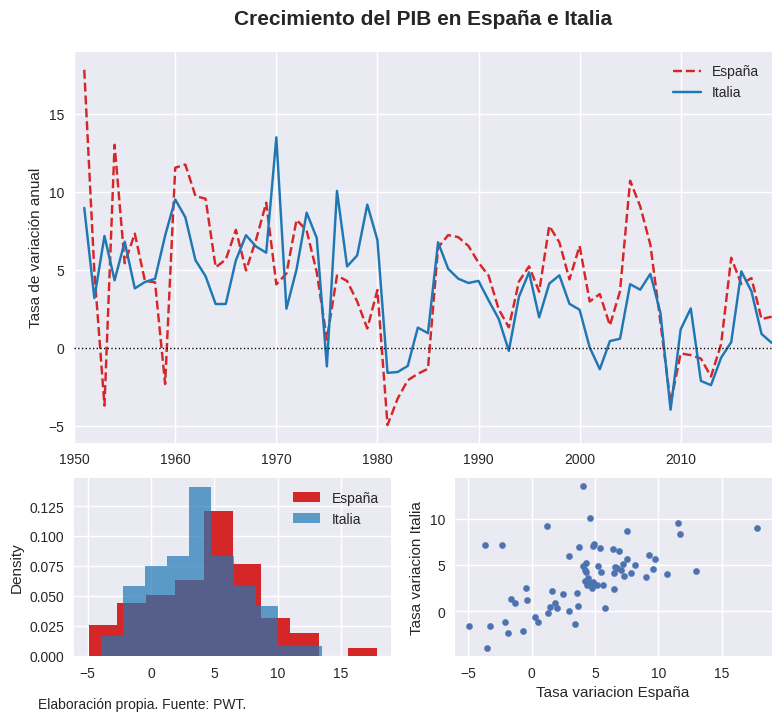

In [ ]:
gridsize=(3,2) #  cuadrícula de 3 filas y 2 columnas
fig=plt.figure(figsize=(9,8),dpi=100)
ax1=plt.subplot2grid(gridsize,(0,0),colspan=2,rowspan=2)
ax2=plt.subplot2grid(gridsize,(2,0),colspan=1,rowspan=1)
ax3=plt.subplot2grid(gridsize,(2,1),colspan=1,rowspan=1)
#Axes1
tv['rgdpo']['España'].plot(label="España",style="--",c="tab:red", ax=ax1)
tv['rgdpo']['Italia'].plot(label="Italia",style="-", c="tab:blue", ax=ax1)
ax1.axhline(y=0, linewidth=1, linestyle=":", color="black")
ax1.set_xlabel("")
ax1.set_xlabel("")
ax1.set_ylabel("Tasa de variación anual")
ax1.set_title("Crecimiento del PIB en España e Italia", size=15, pad=20, fontweight='bold')
ax1.legend(frameon=False)
#Axes2
tv['rgdpo']['España'].plot.hist(label="España",color="tab:red", ax=ax2, density=True)
tv['rgdpo']['Italia'].plot.hist(label="Italia",color="tab:blue",ax=ax2, density=True, alpha=0.7)
ax2.set_ylabel("Density")
ax2.legend(frameon=False)
#Axes3
tv['rgdpo'].plot.scatter(x='España',y='Italia',ax=ax3)
ax3.set_ylabel("Tasa variacion Italia")
ax3.set_xlabel("Tasa variacion España")
# Aplicable al conjunto de la figura
fig.text(0.2,0.06,"Elaboración propia. Fuente: PWT.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.subplots_adjust(hspace=0.2)
plt.show()


**Ejercicio**: Repita el gráfico anterior para Reino Unido y Alemania y para el periodo de 1960 en adelante

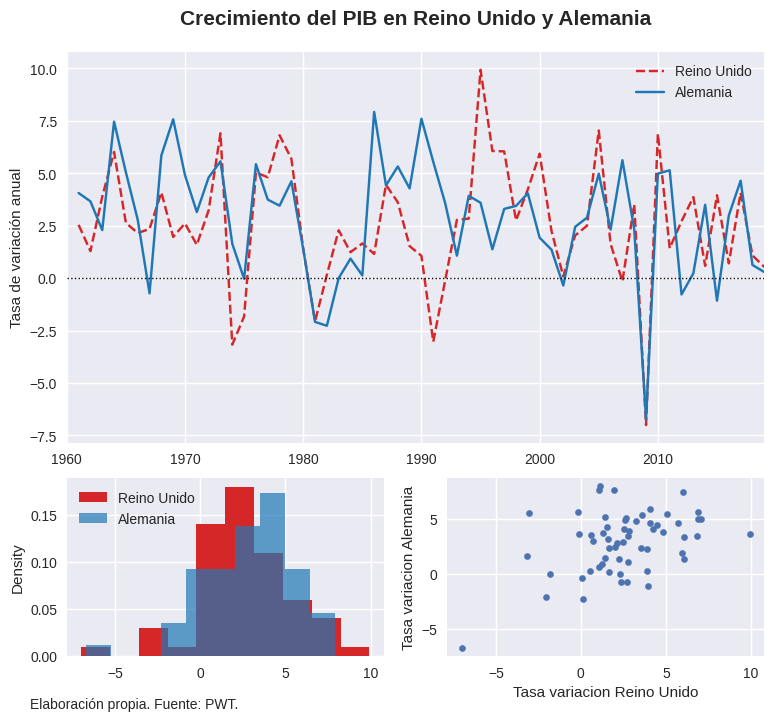

In [ ]:
df=pwt.loc[pwt.year>=1960].copy()
df=df.loc[(pwt['country']=="United Kingdom")|(df['country']=="Germany"),['year','country','pop','rgdpo']]
df=df.set_index(['year','country']).unstack('country') # Observar que hemos creado un MultiIndex table
df.rename(columns={"United Kingdom": "Reino Unido","Germany":"Alemania"},inplace=True) # Para que luego salga en castellano
df.index=pd.to_datetime(df.index,format='%Y') # Ponemos eje en formato fecha
tv=df.diff()/df.shift()*100

gridsize=(3,2) #  cuadrícula de 3 filas y 2 columnas
fig=plt.figure(figsize=(9,8),dpi=100)
ax1=plt.subplot2grid(gridsize,(0,0),colspan=2,rowspan=2)
ax2=plt.subplot2grid(gridsize,(2,0),colspan=1,rowspan=1)
ax3=plt.subplot2grid(gridsize,(2,1),colspan=1,rowspan=1)
#Axes1
tv['rgdpo']['Reino Unido'].plot(label="Reino Unido",style="--",c="tab:red", ax=ax1)
tv['rgdpo']['Alemania'].plot(label="Alemania",style="-", c="tab:blue", ax=ax1)
ax1.axhline(y=0, linewidth=1, linestyle=":", color="black")
ax1.set_xlabel("")
ax1.set_xlabel("")
ax1.set_ylabel("Tasa de variación anual")
ax1.set_title("Crecimiento del PIB en Reino Unido y Alemania", size=15, pad=20, fontweight='bold')
ax1.legend(frameon=False)
#Axes2
tv['rgdpo']['Reino Unido'].plot.hist(label="Reino Unido",color="tab:red", ax=ax2, density=True)
tv['rgdpo']['Alemania'].plot.hist(label="Alemania",color="tab:blue",ax=ax2, density=True, alpha=0.7)
ax2.set_ylabel("Density")
ax2.legend(frameon=False)
#Axes3
tv['rgdpo'].plot.scatter(x='Reino Unido',y='Alemania',ax=ax3)
ax3.set_ylabel("Tasa variacion Alemania")
ax3.set_xlabel("Tasa variacion Reino Unido")
# Aplicable al conjunto de la figura
fig.text(0.2,0.06,"Elaboración propia. Fuente: PWT.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.subplots_adjust(hspace=0.2)
plt.show()